In [3]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

# Load the data
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))

# Combine train and test data
df = pd.concat([train, test], ignore_index=True)

# Create combined text column
df['combined_text'] = df['title'] + ' ' + df['text']

# Define text cleaning functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls(text)
    text = remove_stopwords(text)
    return text

# Apply text cleaning to combined_text column
df['combined_text'] = df['combined_text'].apply(denoise_text)

<>:27: SyntaxWarning: invalid escape sequence '\['
<>:27: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_12522/2757414184.py:27: SyntaxWarning: invalid escape sequence '\['
  return re.sub('\[[^]]*\]', '', text)
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/subarno/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/tmp/ipykernel_12522/2757414184.py:23: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


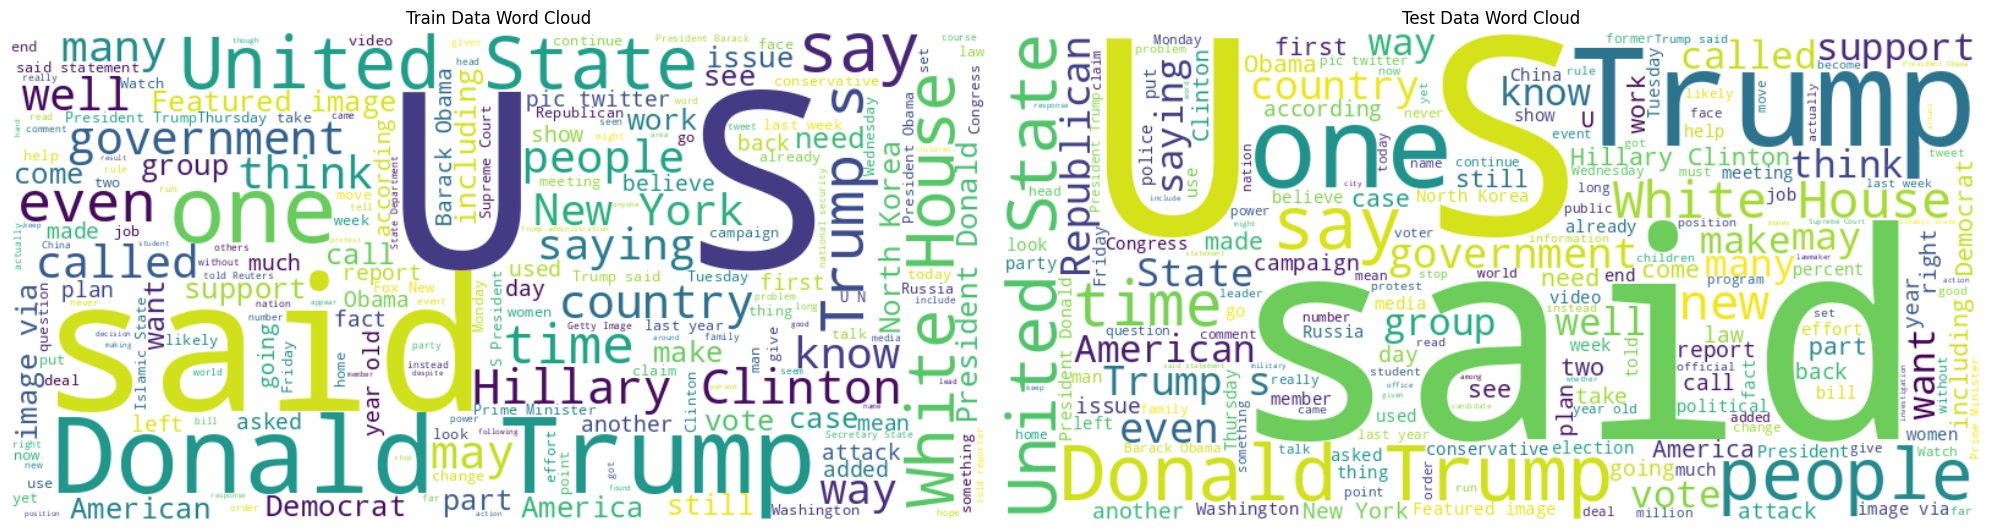

In [5]:
# Split back into train and test
train_df = df.iloc[:len(train)]
test_df = df.iloc[len(train):]

# Generate word clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Train word cloud
train_text = ' '.join(train_df['combined_text'])
train_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(train_text)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(train_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Train Data Word Cloud')

# Test word cloud  
test_text = ' '.join(test_df['combined_text'])
test_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(test_text)

plt.subplot(1,2,2)
plt.imshow(test_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Test Data Word Cloud')

plt.tight_layout()
plt.show()

/tmp/ipykernel_12522/3303078865.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


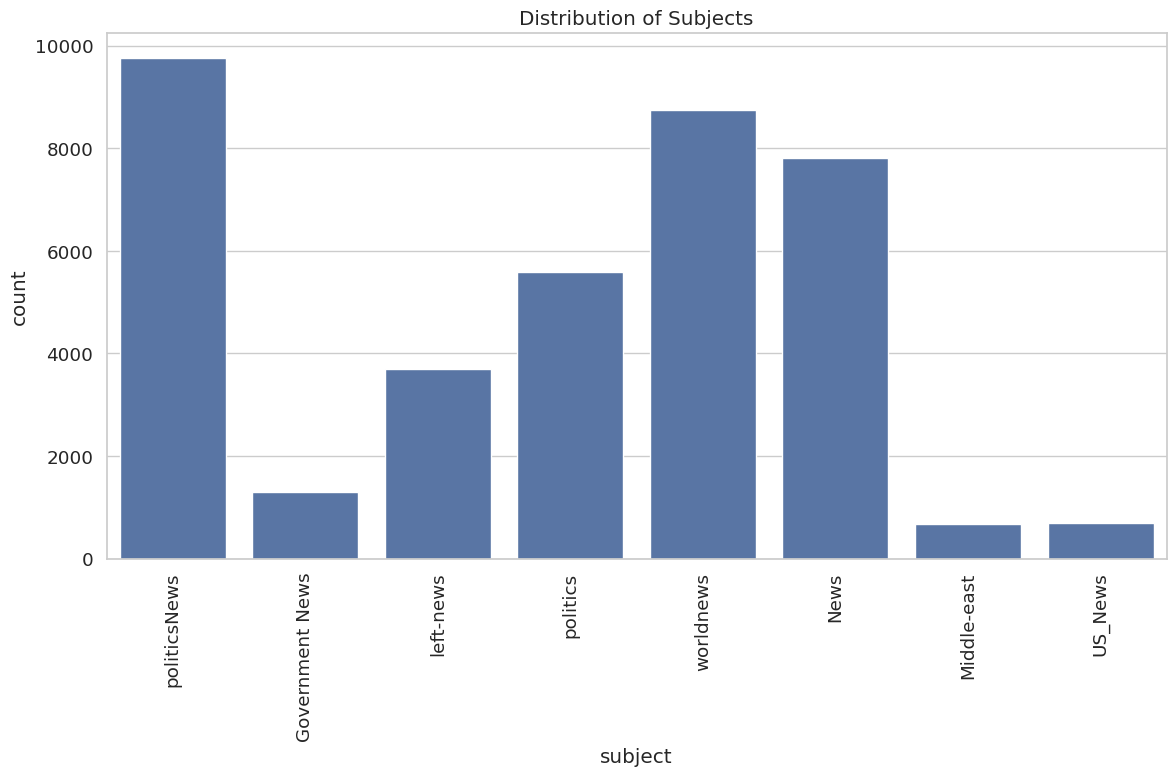

In [7]:
# Visualize distribution of subjects
import seaborn as sns

plt.figure(figsize=(12,8))
sns.set(style="whitegrid", font_scale=1.2)
chart = sns.countplot(x="subject", data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Distribution of Subjects")
plt.tight_layout()
plt.show()


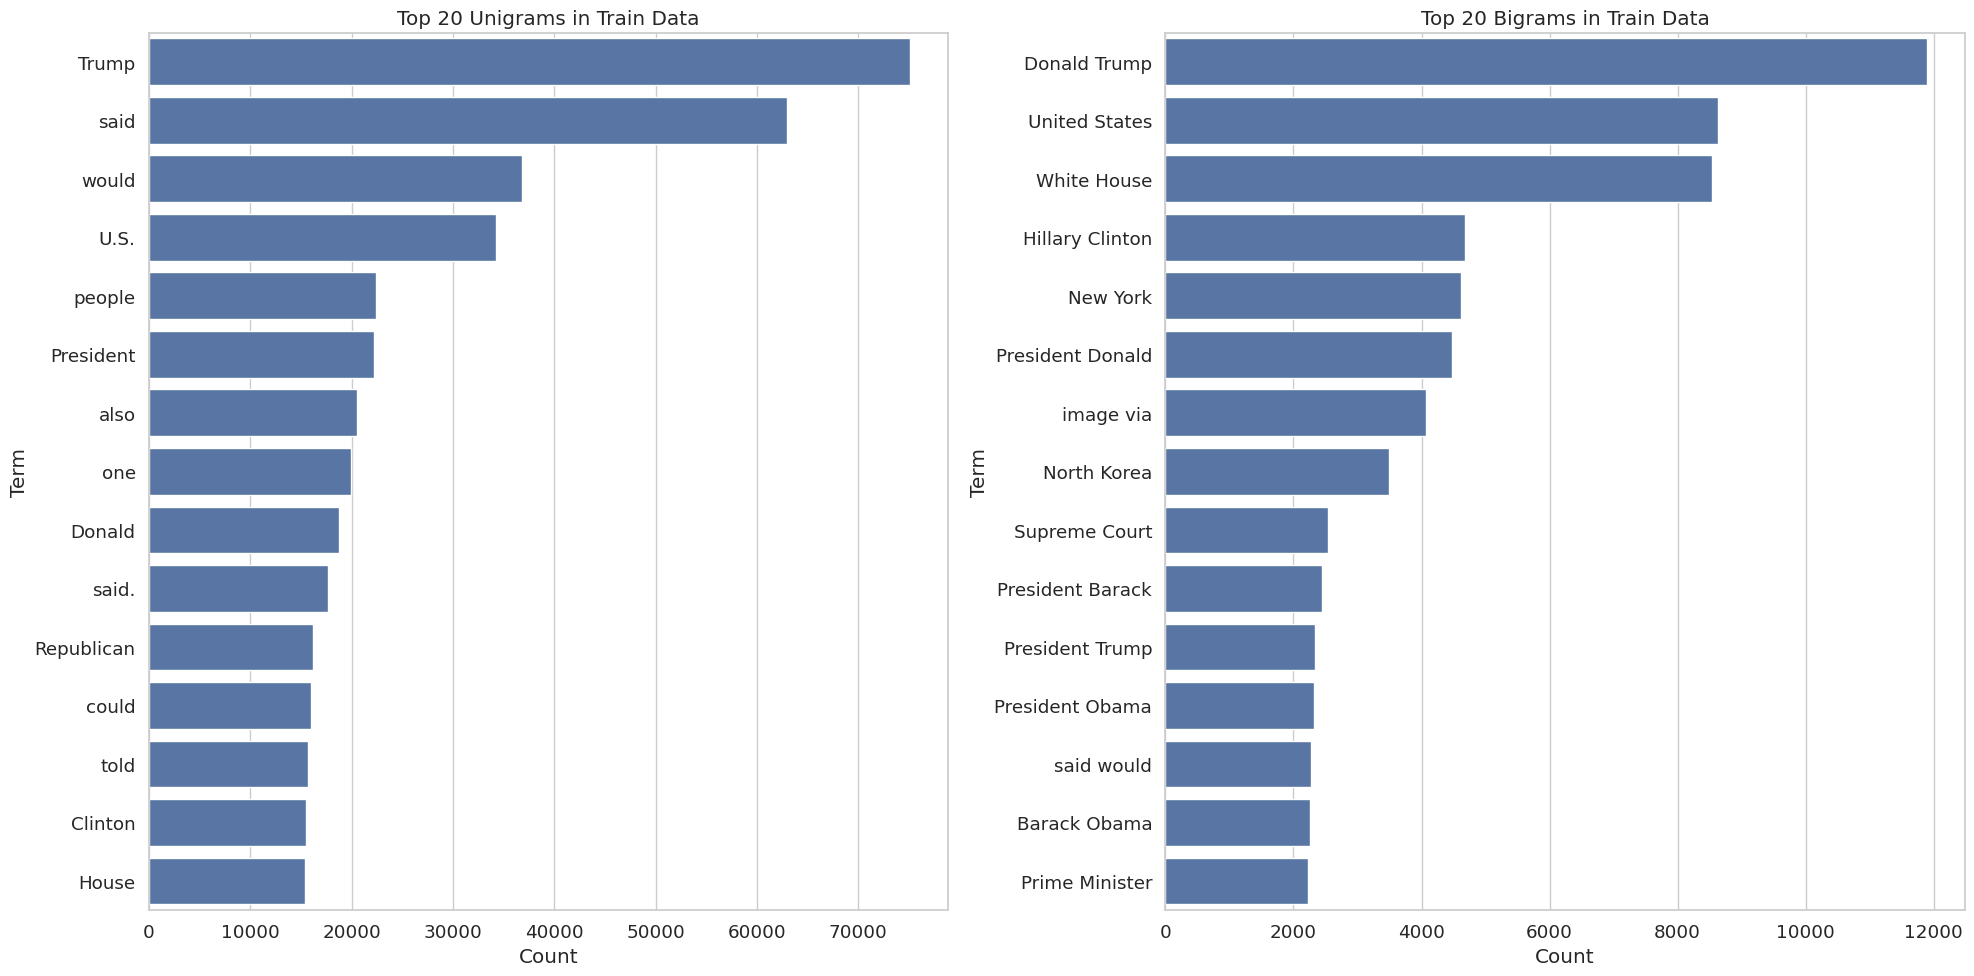

In [11]:
# Unigram and Bigram Analysis
from collections import Counter
from nltk import ngrams
import pandas as pd

# Function to get top n-grams
def get_top_ngrams(text, n, top_k=15):
    # Generate n-grams
    n_grams = ngrams(text.split(), n)
    # Count frequencies
    counter = Counter(n_grams)
    # Convert to DataFrame and handle formatting
    if n == 1:
        # For unigrams, convert tuple to string
        items = [(item[0], count) for item, count in counter.most_common(top_k)]
        df = pd.DataFrame(items, columns=['Term', 'Count'])
    else:
        # For bigrams, join tuple elements
        items = [(' '.join(item), count) for item, count in counter.most_common(top_k)]
        df = pd.DataFrame(items, columns=['Term', 'Count'])
    return df

# Get top unigrams and bigrams for train data
train_unigrams = get_top_ngrams(train_text, 1)
train_bigrams = get_top_ngrams(train_text, 2)

# Plot
plt.figure(figsize=(20,10))

# Unigrams plot
plt.subplot(1,2,1)
chart1 = sns.barplot(data=train_unigrams, x='Count', y='Term')
plt.title('Top 20 Unigrams in Train Data')

# Bigrams plot  
plt.subplot(1,2,2)
chart2 = sns.barplot(data=train_bigrams, x='Count', y='Term')
plt.title('Top 20 Bigrams in Train Data')

plt.tight_layout()
plt.show()


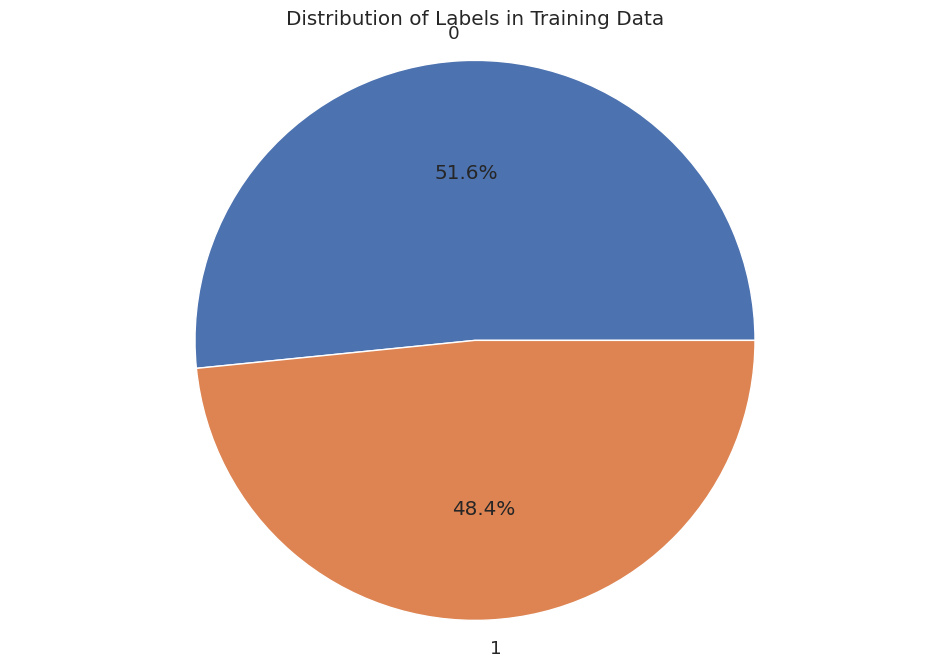


Label Distribution:
label
0    15478
1    14522
Name: count, dtype: int64


In [15]:
# Analyze label distribution
plt.figure(figsize=(12,8))
label_counts = train_df['label'].value_counts()

# Create pie chart
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Labels in Training Data')
plt.axis('equal')
plt.show()

# Print actual counts
print("\nLabel Distribution:")
print(label_counts)
